<a href="https://colab.research.google.com/github/Serg132003/Hello_world/blob/master/Zindi_Courosera__Fine_Tune_BERT_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
#!nvidia-smi

### Install TensorFlow and TensorFlow Model Garden

In [ ]:
import tensorflow as tf
print(tf.version.VERSION)

2.4.1


In [ ]:
!git clone --depth 1 -b v2.3.0 https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 2650, done.
remote: Counting objects: 100% (2650/2650), done.
remote: Compressing objects: 100% (2311/2311), done.
remote: Total 2650 (delta 507), reused 1382 (delta 306), pack-reused 0
Receiving objects: 100% (2650/2650), 34.01 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (507/507), done.
Note: checking out '400d68abbccda2f0f6609e3a924467718b144233'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
# install requirements to use tensorflow/models repository
!pip install -Uqr models/official/requirements.txt
# you may have to restart the runtime afterwards

     |████████████████████████████████| 6.5MB 5.7MB/s 
     |████████████████████████████████| 225kB 68.7MB/s 
     |████████████████████████████████| 15.3MB 355kB/s 
     |████████████████████████████████| 9.9MB 136kB/s 
     |████████████████████████████████| 296kB 79.6MB/s 
     |████████████████████████████████| 102kB 13.1MB/s 
     |████████████████████████████████| 27.4MB 1.2MB/s 
     |████████████████████████████████| 174kB 80.2MB/s 
     |████████████████████████████████| 3.7MB 80.8MB/s 
     |████████████████████████████████| 706kB 81.3MB/s 
     |████████████████████████████████| 358kB 60.0MB/s 
     |████████████████████████████████| 1.2MB 65.9MB/s 
     |████████████████████████████████| 11.6MB 13.3MB/s 
     |████████████████████████████████| 37.6MB 65kB/s 
     |████████████████████████████████| 645kB 78.9MB/s 
     |████████████████████████████████| 2.2MB 71.5MB/s 
     |████████████████████████████████| 102kB 13.8MB/s 
     |████████████████████████████████| 51kB 8.2MB

**MORE LIKELY IN PREVIOUS CELL YOU WILL SEE A BUNCH OF ERRORS. WHAT YOU HAVE TO DO - RESTART RUNTIME FROM MENU AND CONTINUE.**

## Task 3: Download and Import Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import sys
sys.path.append('models')
from official.nlp.data import classifier_data_lib
from official.nlp.bert import tokenization
from official.nlp import optimization

In [ ]:
print("TF Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

TF Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Tunisian Arabizi/Train.csv')#compression='zip', low_memory=False)
test = pd.read_csv('/content/drive/MyDrive/Tunisian Arabizi/Test.csv')                 
df.shape

(70000, 3)

In [ ]:
df.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,-1
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,-1
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,-1
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,-1


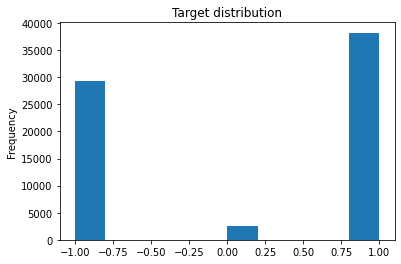

In [ ]:
df.label.plot(kind='hist', title='Target distribution');


BECAUSE OF SNALL AMOUNT NEUTRAL LABELS (0) I DECIDED FOR SIMPLICITY ELIMINATE THEM.

In [ ]:

df1 = df[df.label != 0]

In [ ]:
#instead of -1 and 1 i change to 0 and 1
pd.options.mode.chained_assignment = None  # default='warn'
df1['label'] = df1['label'].replace(-1, 0)


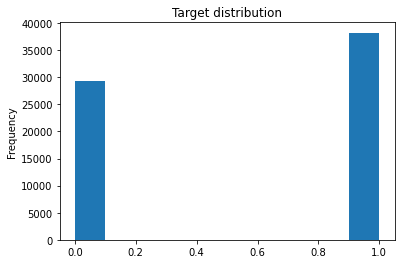

In [ ]:
df1.label.plot(kind='hist', title='Target distribution');

In [ ]:
df1.head()

,ID,text,label
0,13P0QT0,3sbaaaaaaaaaaaaaaaaaaaa lek ou le seim riahi o...,0
1,SKCLXCJ,cha3eb fey9elkoum menghir ta7ayoul ou kressi,0
2,V1TVXIJ,bereau degage nathef ya slim walahi ya7chiw fi...,0
3,U0TTYY8,ak slouma,1
4,68DX797,entom titmanou lina a7na 3iid moubarik a7na ch...,0


In [ ]:
train_data, valid_data = train_test_split(df1, test_size= 0.1, random_state=42, stratify=df1.label.values)

In [ ]:
with tf.device('/cpu:0'):
  train_data = tf.data.Dataset.from_tensor_slices((train_data.text.values, train_data.label.values))
  valid_data = tf.data.Dataset.from_tensor_slices((valid_data.text.values, valid_data.label.values))
  #test_data =  tf.data.Dataset.from_tensor_slices((test.text.values))

  for text, label in train_data.take(1):
    print(text)
    print(label)

tf.Tensor(b'f\xc3\xa9licitations rabi yhenikom', shape=(), dtype=string)
tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
#!pip install -q tf-models-official==2.3.0

## Task 5: Download a Pre-trained BERT Model from TensorFlow Hub

In [ ]:
"""
Each line of the dataset is composed of the review text and its label
- Data preprocessing consists of transforming text to BERT input features:
input_word_ids, input_mask, segment_ids
- In the process, tokenizing the text is done with the provided BERT model tokenizer
"""

label_list = [0, 1] # Label categories
max_seq_length =132 # maximum length of (token) input sequences
train_batch_size = 32

# Get BERT layer and tokenizer:
# More details here: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2",
                             trainable=True)


vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [ ]:
# This provides a function to convert row to input features and label

def to_feature(text, label, label_list=label_list, max_seq_length=max_seq_length, tokenizer=tokenizer):
  example = classifier_data_lib.InputExample(guid = None,
                                            text_a = text.numpy(), 
                                            text_b = None, 
                                            label = label.numpy())
  feature = classifier_data_lib.convert_single_example(0, example, label_list,
                                    max_seq_length, tokenizer)
  
  return (feature.input_ids, feature.input_mask, feature.segment_ids, feature.label_id)

## Task 7: Wrap a Python Function into a TensorFlow op for Eager Execution

In [ ]:
def to_feature_map(text, label):
  input_ids, input_mask, segment_ids, label_id = tf.py_function(to_feature, inp=[text, label], 
                                Tout=[tf.int32, tf.int32, tf.int32, tf.int32])

  # py_func doesn't set the shape of the returned tensors.
  input_ids.set_shape([max_seq_length])
  input_mask.set_shape([max_seq_length])
  segment_ids.set_shape([max_seq_length])
  label_id.set_shape([])

  x = {
        'input_word_ids': input_ids,
        'input_mask': input_mask,
        'input_type_ids': segment_ids
    }
  return (x, label_id)

## Task 8: Create a TensorFlow Input Pipeline with `tf.data`

In [ ]:
with tf.device('/cpu:0'):
  # train
  train_data = (train_data.map(to_feature_map,
                              num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          #.cache()
                          .shuffle(1000)
                          .batch(train_batch_size, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE))

  # valid
  valid_data = (valid_data.map(to_feature_map,
                            num_parallel_calls=tf.data.experimental.AUTOTUNE)
                          .batch(train_batch_size, drop_remainder=True)
                          .prefetch(tf.data.experimental.AUTOTUNE)) 
 

The resulting `tf.data.Datasets` return `(features, labels)` pairs, as expected by [`keras.Model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit):

In [ ]:
# data spec
train_data.element_spec

({'input_mask': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# data spec
valid_data.element_spec

({'input_mask': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None),
  'input_type_ids': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None),
  'input_word_ids': TensorSpec(shape=(32, 160), dtype=tf.int32, name=None)},
 TensorSpec(shape=(32,), dtype=tf.int32, name=None))

In [ ]:
# Building the model
def create_model():
  input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                      name="input_word_ids")
  input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_mask")
  input_type_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                  name="input_type_ids")

  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, input_type_ids])

  drop = tf.keras.layers.Dropout(0.3)(pooled_output)
  output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(drop)

  model = tf.keras.Model(
    inputs={
        'input_word_ids': input_word_ids,
        'input_mask': input_mask,
        'input_type_ids': input_type_ids
    },
    outputs=output)
  return model

## Task 10: Fine-Tune BERT for Text Classification

In [ ]:
model = create_model()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_type_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_6 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

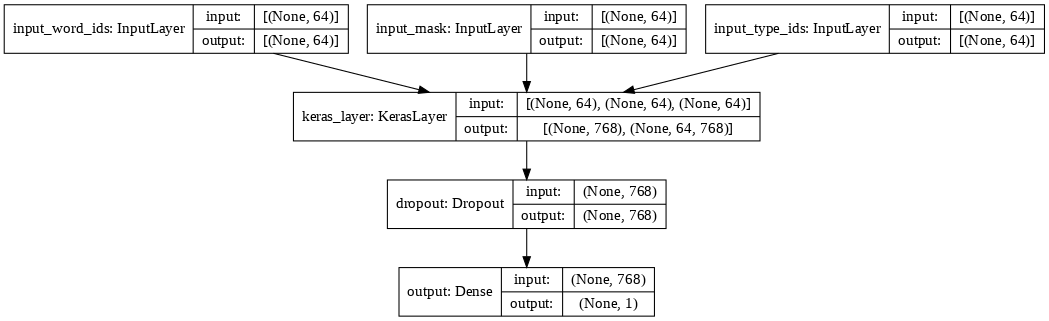

In [ ]:
tf.keras.utils.plot_model(model=model, show_shapes=True, dpi=76, )

In [ ]:
# Train model
epochs = 3
history = model.fit(train_data,
                    validation_data=valid_data,
                    epochs=epochs,
                    verbose=1)

Epoch 1/3
1899/1899 [==============================] - 1194s 623ms/step - loss: 0.5158 - binary_accuracy: 0.7284 - val_loss: 0.3780 - val_binary_accuracy: 0.8223
Epoch 2/3
1899/1899 [==============================] - 1183s 622ms/step - loss: 0.3498 - binary_accuracy: 0.8403 - val_loss: 0.3678 - val_binary_accuracy: 0.8411
Epoch 3/3
1899/1899 [==============================] - 1182s 622ms/step - loss: 0.2655 - binary_accuracy: 0.8877 - val_loss: 0.3713 - val_binary_accuracy: 0.8378


## Task 11: Evaluate the BERT Text Classification Model

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

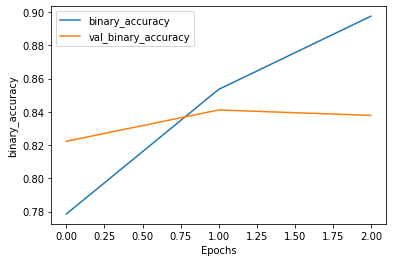

In [ ]:
plot_graphs(history, 'binary_accuracy')

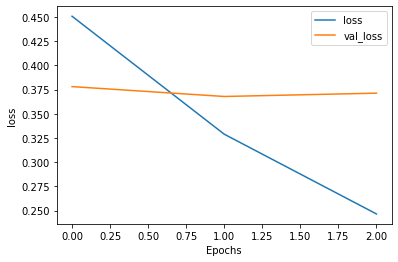

In [ ]:
plot_graphs(history, 'loss')

In [ ]:
model.evaluate(valid_data, verbose=1)

211/211 [==============================] - 42s 200ms/step - loss: 0.3713 - binary_accuracy: 0.8378


[0.3712572157382965, 0.8378258347511292]

In [ ]:
test1 =test.drop(['ID'], axis =1 ).values
res = [''.join(ele) for ele in test1] 

In [ ]:
test_data = tf.data.Dataset.from_tensor_slices((res, [0]*len(res)))
test_data = (test_data.map(to_feature_map).batch(1))
preds = model.predict(test_data)
pred = np.round(np.reshape(preds, 30000)).astype(int)

In [ ]:
sub = test.drop(['text'],axis =1)
sub['label'] = pred
sub['label'] = sub['label'].replace(0, -1)

In [ ]:
sub.head()

,ID,label
0,2DDHQW9,-1
1,5HY6UEY,-1
2,ATNVUJX,1
3,Q9XYVOQ,-1
4,TOAHLRH,1


In [ ]:
sub.to_csv('Submission_fine_runed_Bert.csv', index=False)